In [26]:
import csv
import time
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, clear_output
import pandas as pd



In [19]:
def extract_last_element(csv_file_path="results.csv"):
    
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            if len(row) >= 2:
                last_element = row[1:6]  # 2nd column (index 1)
        return last_element

In [11]:
def plotly_graphic(data):
    co2_values, temperature_values, humidity_values, timestamps, _ = zip(*data)
    
    # Create a figure with plotly.graph_objects
    fig = go.Figure()

    # Add scatter traces for each data series
    fig.add_trace(go.Scatter(x=timestamps, y=co2_values, mode='markers+lines', name='co2', marker=dict(color='green')))
    fig.add_trace(go.Scatter(x=timestamps, y=temperature_values, mode='markers+lines', name='temperature', marker=dict(color='purple')))
    fig.add_trace(go.Scatter(x=timestamps, y=humidity_values, mode='markers+lines', name='humidity', marker=dict(color='blue')))

    # Update layout options
    fig.update_layout(
        title='Sensor Data',
        xaxis=dict(title='Time'),
        yaxis=dict(title='Value'),
    )

    # Show the plot
    fig.show()
    time.sleep(0.5)
    clear_output(wait=True)

In [12]:
elements=[]
def extract_item(last_element):
    elements.append(last_element)
    data = []
    for row in elements:
        timestamp = float(row[4])
        co2_value = float(row[1])
        temperature_value = float(row[2])
        humidity_value = float(row[3])
        order = len(data)
        data.append((co2_value, temperature_value, humidity_value, timestamp, order))

    # Sort the data based on timestamp
    sorted_data = sorted(data, key=lambda x: x[3])
    plotly_graphic(sorted_data)



In [24]:
elements=[]
id_ubi=[]
co2=[]
Temperature=[]
Humidity=[]
Timestamp=[]

start_time = time.time()
n=2

for i in range(28):
     time.sleep(2)
     last_element=extract_last_element()
     extract_item(last_element)



In [27]:
def load_data(csv_file_path):
    # Cargar los datos del archivo CSV en un DataFrame de Pandas
    df = pd.read_csv(csv_file_path)
    return df

def plot_data_by_id_ubi(df):
    # Crear una figura con Plotly Express para visualizar los datos por id_ubi
    fig = px.line(df, x='Timestamp', y=['CO2', 'Temperature', 'Humidity'], color='id_ubi')

    # Actualizar las opciones de diseño
    fig.update_layout(
        title='Sensor Data by id_ubi',
        xaxis=dict(title='Time'),
        yaxis=dict(title='Value'),
    )

    # Mostrar el gráfico
    fig.show()

csv_file_path = "results.csv"  # Ruta del archivo CSV

# Cargar los datos del archivo CSV
data = load_data(csv_file_path)

# Graficar los datos por id_ubi
plot_data_by_id_ubi(data)


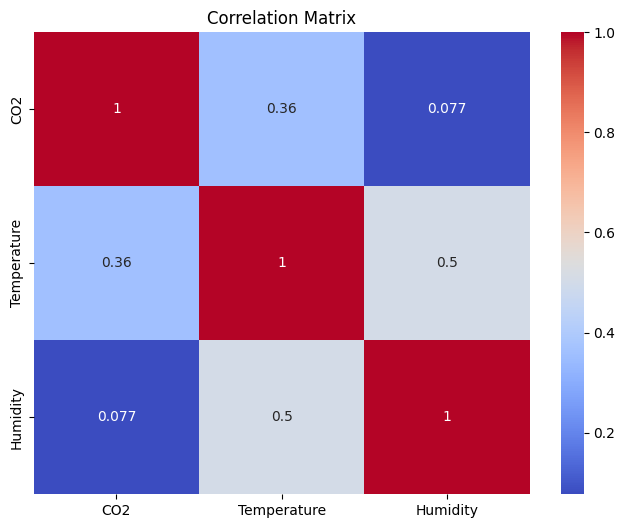

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df):
    # Calcular la matriz de correlación
    corr_matrix = df[['CO2', 'Temperature', 'Humidity']].corr()

    # Crear una figura con seaborn para visualizar la matriz de correlación
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

    # Actualizar el título
    ax.set_title('Correlation Matrix')

    # Mostrar el gráfico
    plt.show()

plot_correlation_matrix(data)


In [30]:
def plot_bar_comparison(df):
    # Calcular los promedios por ubicación
    avg_values = df.groupby('id_ubi')[['CO2', 'Temperature', 'Humidity']].mean().reset_index()

    # Crear una figura con Plotly Express para visualizar la comparación de valores promedio
    fig = px.bar(avg_values, x='id_ubi', y=['CO2', 'Temperature', 'Humidity'],
                 barmode='group', labels={'value': 'Average Value'},
                 title='Average Values by id_ubi')

    # Mostrar el gráfico
    fig.show()

plot_bar_comparison(data)


In [33]:
def plot_3d_scatter(df):
    # Crear una figura con Plotly Graph Objects para visualizar el gráfico de dispersión tridimensional
    fig = go.Figure(data=go.Scatter3d(
        x=df['CO2'],
        y=df['Temperature'],
        z=df['Humidity'],
        mode='markers',
        marker=dict(size=5, color=df['id_ubi'], colorscale='Viridis', colorbar=dict(title='id_ubi')),
        text=df['id_ubi'],
        hovertemplate='id_ubi: %{text}<br>CO2: %{x}<br>Temperature: %{y}<br>Humidity: %{z}',
        showlegend=True,
        name='Sensor Data'
    ))

    # Actualizar las opciones de diseño
    fig.update_layout(
        title='3D Scatter Plot',
        scene=dict(
            xaxis_title='CO2',
            yaxis_title='Temperature',
            zaxis_title='Humidity'
        ),
        legend=dict(
            title='id_ubi',
            x=0.85,
            y=0.95,
            bgcolor='rgba(255, 255, 255, 0.5)'
        )
    )

    # Mostrar el gráfico
    fig.show()


plot_3d_scatter(data)



In [34]:
def plot_boxplot(df):
    # Crear una figura con Plotly Express para visualizar el boxplot
    fig = px.box(df, x='id_ubi', y=['CO2', 'Temperature', 'Humidity'], points='all',
                 title='Boxplot by id_ubi')

    # Actualizar las opciones de diseño
    fig.update_layout(
        yaxis=dict(title='Value'),
        legend=dict(title='Variable'),
    )

    # Mostrar el gráfico
    fig.show()

plot_boxplot(data)
